# Study of risk allocation
Lets assume we measure the risk based on CVaR with confidence level of 95%.

## Calculate instrument's risk.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from tabulate import tabulate
from datetime import date

# Plotting
import matplotlib.pyplot as plt
import seaborn
from IPython.display import display, HTML

#Statistical calculation
import math
from scipy.stats import norm

# Retrieve stock prices
stocks=['AMZN', 'AAPL', 'MSFT', 'ROST', 'JD', 'PDD', 'VYM', 'ALB']
stocks.sort()
prices = yf.download(stocks, "2022-01-01", "2023-02-01")['Adj Close']
# Calculate VaR for each instrument.
rets=prices.pct_change().dropna()
VaRs=pd.DataFrame(np.reshape(norm.ppf(1-0.95, np.mean(rets, axis=0), np.std(rets, axis=0)),(1,len(stocks))), columns=stocks)
display(HTML("<H3>VaRs are:</H3>"))
display(HTML(VaRs.to_html()))

[*********************100%***********************]  8 of 8 completed


,AAPL,ALB,AMZN,JD,MSFT,PDD,ROST,VYM
0,-0.036899,-0.054848,-0.052567,-0.076699,-0.037184,-0.104702,-0.044756,-0.01862


## Calculate risk contribution.

In [2]:
# Get number of shares in position
Shares=pd.DataFrame([[100, 50, 100, 150, 75, 100, 100, 100]], columns=stocks)
display(HTML("<H3>Portfolio composition:</H3>"))
display(HTML(Shares.to_html()))
display(HTML("<H3>Last prices:</H3>"))
display(HTML(prices.iloc[-1:].to_html()))

,AAPL,ALB,AMZN,JD,MSFT,PDD,ROST,VYM
0,100,50,100,150,75,100,100,100


,AAPL,ALB,AMZN,JD,MSFT,PDD,ROST,VYM
Date,,,,,,,,
2023-01-31 00:00:00-05:00,144.289993,281.450012,103.129997,59.529999,247.809998,97.980003,118.190002,110.769997


,AAPL,ALB,AMZN,JD,MSFT,PDD,ROST,VYM
0,-2439.840375,-3537.06404,-2484.3305,-3138.513521,-3167.021966,-4701.116568,-2424.030819,-945.164417


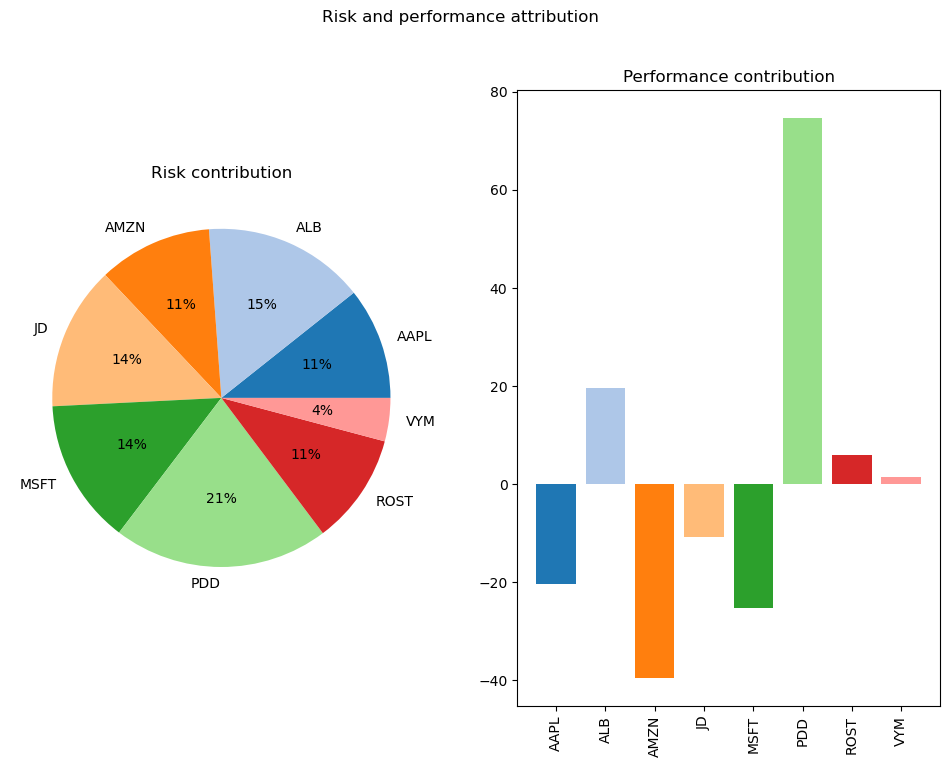

In [4]:
Losses=pd.DataFrame(np.reshape(VaRs.to_numpy()*prices.iloc[-1].to_numpy()*math.sqrt(21)*Shares.to_numpy(),(1,len(stocks))), columns=stocks)
display(HTML("<H3>Potential losses in 1 month:</H3>"))
display(HTML(Losses.to_html()))
display(HTML(f"--- Potential total losses : <B>{Losses.sum(axis=1)[0]:6.2f}</B>."))
display(HTML("<H3>Risk contribution:</H3>"))
#palette_color = seaborn.color_palette('pastel')
palette_color = seaborn.color_palette('tab20')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Risk and performance attribution')
ax1.title.set_text('Risk contribution')
ax1.pie(np.reshape((0-Losses).values.tolist(),len(stocks)), labels=Losses.columns, colors=palette_color, autopct='%.0f%%')

objects = Losses.columns.to_list()
y_pos = np.arange(len(Losses.columns))
performance = np.reshape(((prices.iloc[-1].to_numpy()*Shares.to_numpy())-(prices.iloc[0].to_numpy()*Shares.to_numpy()))/(prices.iloc[0].to_numpy()*Shares.to_numpy()), len(objects))*100
ax2.title.set_text('Performance contribution')
ax2.bar(y_pos, performance, align='center', alpha=1, color=palette_color)
ax2.set_xticks(y_pos, objects, rotation=90)

#plt.pie(np.reshape((0-Losses).values.tolist(),len(stocks)), labels=Losses.columns, colors=palette_color, autopct='%.0f%%')
plt.show()